In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from google.colab import files
uploaded = files.upload()

Saving pima.csv to pima.csv


In [2]:
import io
df= pd.read_csv(io.BytesIO(uploaded[r'pima.csv']))

In [3]:
df.columns

Index(['num_preg', 'glucose_conc', 'bp-dia', 'thickness', 'insulin', 'bmi',
       'diab_pred', 'age', 'diabetes'],
      dtype='object')

In [4]:
df.head(5)

,num_preg,glucose_conc,bp-dia,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Data visualisation**

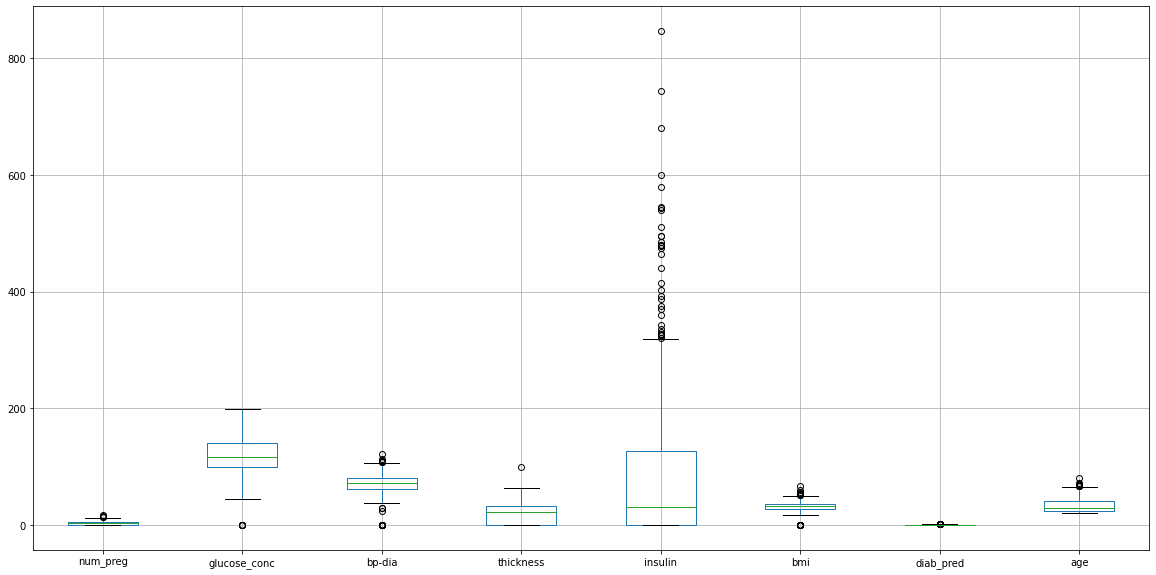

In [5]:
boxplot = df.boxplot(column=['num_preg', 'glucose_conc', 'bp-dia',	'thickness',	'insulin','bmi','diab_pred',	'age'],figsize=(20,10))

**Preprocessing**

In [6]:
df.isnull().values.any()

False

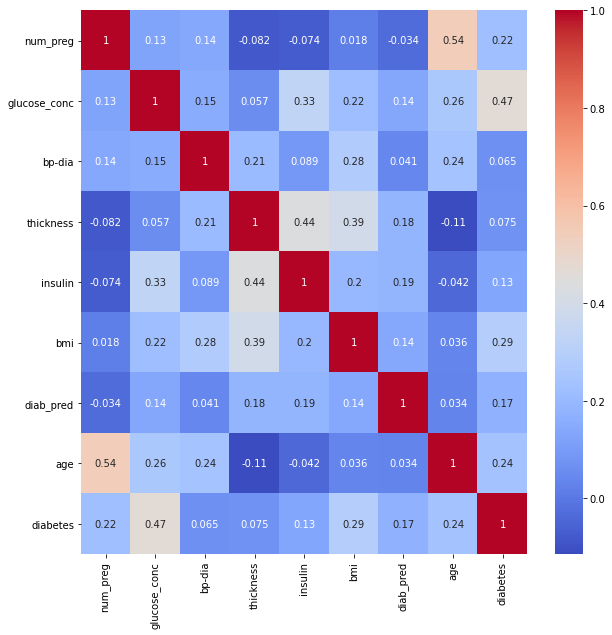

In [7]:
#************correlation***********************
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm");

In [8]:
df.drop(['insulin'],axis=1)

,num_preg,glucose_conc,bp-dia,thickness,bmi,diab_pred,age,diabetes
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,48,32.9,0.171,63,0
764,2,122,70,27,36.8,0.340,27,0
765,5,121,72,23,26.2,0.245,30,0
766,1,126,60,0,30.1,0.349,47,1


**Feature selection**

In [9]:
#****************Outlier detection**********************
df = df[df['thickness']<80]
df = df[df['insulin']<=600]
print(df.shape)

(764, 9)


In [10]:
#***************Missing VAlues**************************
df.loc[df['glucose_conc']==0,'glucose_conc']=df['glucose_conc'].mean()
df.loc[df['bp-dia']==0,'bp-dia']=df['bp-dia'].mean()
df.loc[df['thickness']==0,'thickness']=df['thickness'].mean()
df.loc[df['bmi']==0,'bmi']=df['bmi'].mean()
df.head(5)

,num_preg,glucose_conc,bp-dia,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148.0,72.0,35.000000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,0,26.6,0.351,31,0
2,8,183.0,64.0,20.390052,0,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168,43.1,2.288,33,1


In [11]:
#*******************Variance Threshold******************
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit_transform(df)
sum(sel.get_support())
##Saying all the features are important

9

**X-Y split**

In [12]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]
x.shape,y.shape

((764, 8), (764,))

In [13]:
df.head(5)

,num_preg,glucose_conc,bp-dia,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148.0,72.0,35.000000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,0,26.6,0.351,31,0
2,8,183.0,64.0,20.390052,0,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168,43.1,2.288,33,1



**Data Cleaning**

In [14]:
#*********************Standardization********************
# from sklearn.preprocessing import StandardScaler
# scaling = StandardScaler()
# scaling.fit_transform(df[['glucose_conc','bp-dia','thickness','bmi','diab_pred','age']])
# print(scaling.fit(df))
# df.head(5)

#******************Normalization*************************
df = df/df.max()
df.head(5)

,num_preg,glucose_conc,bp-dia,thickness,insulin,bmi,diab_pred,age,diabetes
0,0.352941,0.743719,0.590164,0.555556,0.000000,0.500745,0.259091,0.617284,1.0
1,0.058824,0.427136,0.540984,0.460317,0.000000,0.396423,0.145041,0.382716,0.0
2,0.470588,0.919598,0.524590,0.323652,0.000000,0.347243,0.277686,0.395062,1.0
3,0.058824,0.447236,0.540984,0.365079,0.156667,0.418778,0.069008,0.259259,0.0
4,0.000000,0.688442,0.327869,0.555556,0.280000,0.642325,0.945455,0.407407,1.0


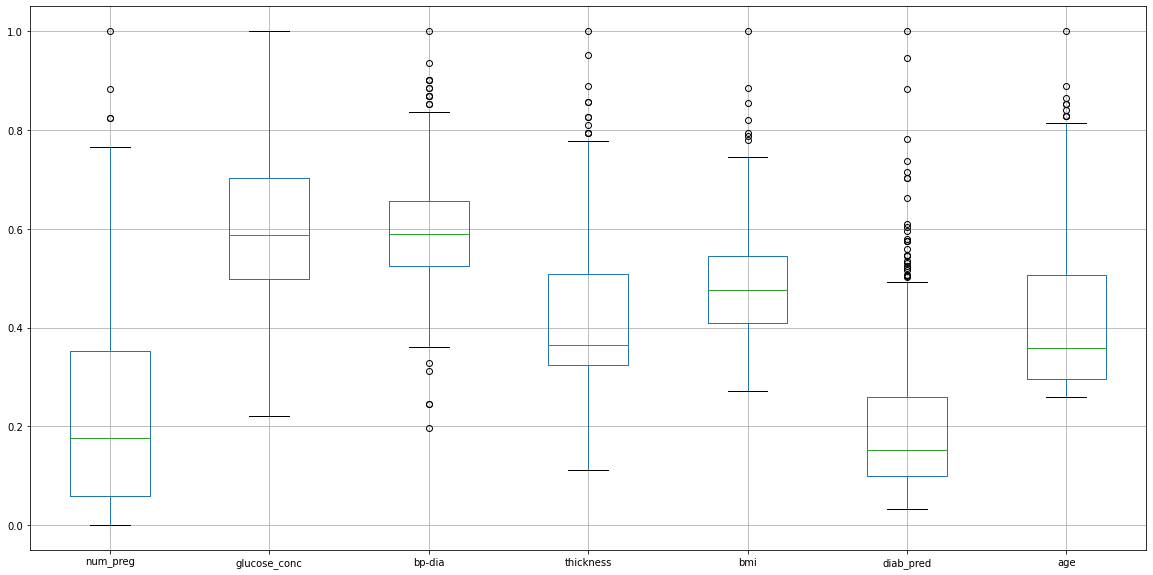

In [15]:
boxplot = df.boxplot(column=['num_preg', 'glucose_conc', 'bp-dia',	'thickness','bmi','diab_pred',	'age'],figsize=(20,10))

**Split test and train**

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=25, random_state =42)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(739, 8)
(739,)
(25, 8)
(25,)


**Models-regression and score**

In [17]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
log_clf = LogisticRegression(max_iter=1000,solver='lbfgs')
rnd_clf = RandomForestClassifier(n_estimators =8,criterion = 'entropy',random_state =7)
svm_clf = SVC()#rfg
svm_sigmoid_clf = SVC(kernel='sigmoid')
svm_linear_clf = SVC(kernel='linear')
for clf in (log_clf, rnd_clf, svm_clf,svm_sigmoid_clf, svm_linear_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__,"accuracy_score",100*accuracy_score(y_test, y_pred))
    print(clf.__class__.__name__,"F1-score",100*f1_score(y_test, y_pred, average="macro"))
    print(clf.__class__.__name__,"Precision Tree",100*precision_score(y_test, y_pred, average="macro"))
    print(clf.__class__.__name__,"Recall score",100*recall_score(y_test, y_pred, average="macro"))
    print("**********************************************************")

LogisticRegression accuracy_score 88.0
LogisticRegression F1-score 85.71428571428571
LogisticRegression Precision Tree 84.55882352941177
LogisticRegression Recall score 87.3015873015873
**********************************************************
RandomForestClassifier accuracy_score 84.0
RandomForestClassifier F1-score 80.15873015873017
RandomForestClassifier Precision Tree 80.15873015873017
RandomForestClassifier Recall score 80.15873015873017
**********************************************************
SVC accuracy_score 92.0
SVC F1-score 90.07936507936508
SVC Precision Tree 90.07936507936508
SVC Recall score 90.07936507936508
**********************************************************
SVC accuracy_score 48.0
SVC F1-score 32.43243243243243
SVC Precision Tree 31.57894736842105
SVC Recall score 33.33333333333333
**********************************************************
SVC accuracy_score 92.0
SVC F1-score 90.07936507936508
SVC Precision Tree 90.07936507936508
SVC Recall score 90.079365079

**Ensemble**

In [18]:
pip install catboost

     |████████████████████████████████| 69.2MB 47kB/s 


In [19]:
#Importing ensembles
from sklearn.ensemble import AdaBoostClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

#**********************ADABOOST*****************************
adaboost = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=1), n_estimators=500, learning_rate=0.5, algorithm='SAMME')
adaboost.fit(x_train,y_train)
y_pred = adaboost.predict(x_test)
print("ADABOOST ","accuracy_score",100*accuracy_score(y_test, y_pred))
print("ADABOOST ","F1-score",100*f1_score(y_test, y_pred, average="macro"))
print("ADABOOST ","Precision Tree",100*precision_score(y_test, y_pred, average="macro"))
print("ADABOOST ","Recall score",100*recall_score(y_test, y_pred, average="macro"))
print("**********************************************************")


#**********************CATBOOST*****************************
catboost = CatBoostClassifier(iterations=10,learning_rate=1,depth=2,loss_function='MultiClass')
catboost.fit(x_train,y_train)
y_pred = catboost.predict(x_test)
print("CATBOOST ","accuracy_score",100*accuracy_score(y_test, y_pred))
print("CATBOOST ","F1-score",100*f1_score(y_test, y_pred, average="macro"))
print("CATBOOST ","Precision Tree",100*precision_score(y_test, y_pred, average="macro"))
print("CATBOOST ","Recall score",100*recall_score(y_test, y_pred, average="macro"))
print("**********************************************************")

#**********************XGBOOST*******************************
xg_boost = XGBClassifier(verbosity=0)
xg_boost.fit(x_train,y_train)
y_pred = xg_boost.predict(x_test)
print("XG_BOOST ","accuracy_score",100*accuracy_score(y_test, y_pred))
print("XG_boost ","F1-score",100*f1_score(y_test, y_pred, average="macro"))
print("XG_boost ","Precision Tree",100*precision_score(y_test, y_pred, average="macro"))
print("XG_boost ","Recall score",100*recall_score(y_test, y_pred, average="macro"))
print("**********************************************************")

ADABOOST  accuracy_score 80.0
ADABOOST  F1-score 77.71836007130123
ADABOOST  Precision Tree 76.66666666666666
ADABOOST  Recall score 81.74603174603175
**********************************************************
0:	learn: 0.5395274	total: 47.2ms	remaining: 424ms
1:	learn: 0.5063356	total: 48.1ms	remaining: 192ms
2:	learn: 0.4743613	total: 48.9ms	remaining: 114ms
3:	learn: 0.4566012	total: 49.8ms	remaining: 74.7ms
4:	learn: 0.4526578	total: 50.5ms	remaining: 50.5ms
5:	learn: 0.4477677	total: 51.3ms	remaining: 34.2ms
6:	learn: 0.4303853	total: 52.1ms	remaining: 22.3ms
7:	learn: 0.4242197	total: 53.1ms	remaining: 13.3ms
8:	learn: 0.4180898	total: 53.9ms	remaining: 5.99ms
9:	learn: 0.4139692	total: 54.7ms	remaining: 0us
CATBOOST  accuracy_score 80.0
CATBOOST  F1-score 77.71836007130123
CATBOOST  Precision Tree 76.66666666666666
CATBOOST  Recall score 81.74603174603175
**********************************************************
XG_BOOST  accuracy_score 76.0
XG_boost  F1-score 73.95833333333333

**Cross Validation**

In [20]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(log_clf,x,y,cv=10,scoring='accuracy'))
print("**********************************************************")
print(cross_val_score(rnd_clf,x,y,cv=10,scoring='accuracy'))
print("**********************************************************")
print(cross_val_score(svm_clf,x,y,cv=10,scoring='accuracy'))
print("**********************************************************")
print(cross_val_score(svm_sigmoid_clf,x,y,cv=10,scoring='accuracy'))
print("**********************************************************")
print(cross_val_score(svm_linear_clf,x,y,cv=10,scoring='accuracy'))

[0.74025974 0.76623377 0.77922078 0.74025974 0.75       0.78947368
 0.78947368 0.78947368 0.72368421 0.84210526]
**********************************************************
[0.68831169 0.81818182 0.67532468 0.77922078 0.75       0.81578947
 0.75       0.75       0.65789474 0.76315789]
**********************************************************
[0.75324675 0.74025974 0.72727273 0.7012987  0.72368421 0.78947368
 0.75       0.80263158 0.76315789 0.81578947]
**********************************************************
[0.53246753 0.51948052 0.45454545 0.45454545 0.39473684 0.42105263
 0.53947368 0.40789474 0.5        0.56578947]
**********************************************************
[0.74025974 0.77922078 0.76623377 0.74025974 0.72368421 0.78947368
 0.78947368 0.78947368 0.73684211 0.81578947]
